# HSE 2021: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** (0.5 points)<br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [2]:
def find_sum(a,d,N):
    result = 0
    for i in range(0, N):
        result += a + i*d
    return result

def float_input(s):
    while True:
        try:
            num = float(input(f"{s}: "))
            return num
        except ValueError:
            print("Enter a float number")
            
def int_positive_input(s):
    while True:
        try:
            num = int(input(f"{s}: "))
            if num >= 0:
                return num
            else:
                print("Enter a positive number")
        except ValueError:
            print("Enter an integer number")

a = float_input('a')
d = float_input('d')
N = int_positive_input('N')
result = find_sum(a, d, N)
print(f"Answer is {result}")
    

a: 1
d: 
Enter a float number
d: 2
N: 3
Answer is 9.0


Check yourself

In [3]:
a = 2
d = 3
N = 15
assert find_sum(a,d,N) == 345, 'Wrong answer'

---
**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [4]:
def check_prime(N):
    #мы знаем, что 2 - первое простое число (1 не считаем)
    #простое число - это число n, у которого делитель только 1 и n
    #можно проверять, есть ли делители только в цикле до sqrt(n)
    if N == 1:
        return False #это не простое число, но и не составное
    i = 2
    while(i*i <= N):
        if N % i == 0:
            return False #есть делитель отличный от 1 и N
        i+=1
    return True

def int_input(s):
    while True:
        try:
            num = int(input(f"{s}: "))
            return num
        except ValueError:
            print("Enter an integer number")

N = int_input('N')
result = check_prime(N)
print(f"Answer is {result}")

N: 2
Answer is True


Check yourself

In [5]:
inp = [3, 8, 13, 111, 113, 237, 307, 479, 481]
answer = [True, False, True, False, True, False, True, True, False]

for N, ans in zip(inp, answer):
    assert check_prime(N) == ans, f'Wrong answer for input {N}, {ans} is expected'

---
**Task 3** (0.5 points) <br/> 
Find the first `N` prime numbers (you may use the function from the previous task).

In [6]:
def find_primes(N):
    result = list()
    i = 2
    while(len(result) < N):
        if check_prime(i):
            result.append(i)
        i+=1
    return result
N = int_input('N')
find_primes(N)

N: 3


[2, 3, 5]

Check yourself

In [7]:
assert find_primes(5) == [2, 3, 5, 7, 11], 'Wrong answer'

---
**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` or any other functions, find the maximum number.

In [8]:
def find_max(a, b, c):
    if(a >= b) and (a >= c):
        return a
    if(b >= a) and (b >= c):
        return b
    if(c >= a) and (c >= b):
        return c
a = float_input('a')
b = float_input('b')
c = float_input('c')
find_max(a, b, c)

a: 4
b: 124
c: 4


124.0

Check yourself

In [9]:
from random import randint
for i in range(10):    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    answer = np.max([a, b, c])  # You cannot use `np.max` in the solution ;)
    print(f'Checking on {a, b, c}')
    assert find_max(a, b, c) == answer, f'Wrong maximum, {answer} is expected'

Checking on (-69, -32, 5)
Checking on (-75, -27, -49)
Checking on (-92, -57, -5)
Checking on (-84, -15, -96)
Checking on (-42, 25, -39)
Checking on (-67, 71, -42)
Checking on (71, 13, -30)
Checking on (100, 19, 36)
Checking on (-81, 21, 75)
Checking on (-44, -58, 12)


# 2. Numpy (4 points)
### **!Do not use loops in the tasks below, see disclamer at the top of the notebook**

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 20 and with sum of its elements equals to 3.

In [10]:
my_array = np.random.rand(20)
s = sum(my_array) #сумма всех значений
my_array = my_array * 3 / s #нормируем элементы
print(f"sum is {sum(my_array)}")
print(f"len is {len(my_array)}")

sum is 3.0000000000000004
len is 20


Check yourself

In [11]:
assert len(my_array) == 20
assert np.allclose(np.sum(my_array), 3)

---
**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special functions. You may only use basic numpy operations (first level functions like `np.dot` are ok, higher level functions like `np.linalg.*` are prohibited).**:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}, \,\, \text{where}\,\, ||a||_2 = \sqrt{\sum_i a_i^2} $$

In [12]:
def cal_euclidean(a, b):    
    return np.sqrt(sum((a - b)*(a - b)))
    

def cal_manhattan(a, b):    
    return sum(np.abs(a-b))

    
def cal_cosine(a, b):    
    return 1 - (np.dot(a, b))/(np.sqrt(np.dot(a, a)) * np.sqrt(np.dot(b, b)))

In [13]:
a = np.random.rand(20)
b = np.random.rand(20)

In [14]:
print(cal_euclidean(a, b))
print(cal_manhattan(a, b))
print(cal_cosine(a, b))

1.7510934336289279
6.684856235445083
0.18973691272428073


Check yourself

In [15]:
a = np.ones(10)*0.1
b = np.ones(10)

assert np.allclose(cal_euclidean(a, b), 2.846049)
assert np.allclose(cal_manhattan(a, b), 9)
assert np.allclose(cal_cosine(a, b), 0)

---
**Task 3** (0.5 points) <br/>
Create a function `custom_scaler`, which takes as input an array with integer values and transforms an array, so that:
* Maximum element(s) value is 2 (it **doesn't** mean `a[max_index] = 2`)
* Minimum element(s) value is -2 (it **doesn't** mean `a[min_index] = -2`)
* Other values are in the interval [-2, 2] (using **arithmetic** transformations)

In [16]:
def custom_scaler(my_array):
    #нужно найти макимум и минимум,
    #затем вычесть минимум из каждого элемента (то есть чтобы минимум был 0)
    #теперь new_max = max - min
    #затем нужно, чтобы максимум был 4, то есть делим на (max - min) и умножаем на 4
    #затем сдвигаем на 2 влево, то есть вычитаем 2
    max_array = np.max(my_array)
    min_array = np.min(my_array)
    my_array = (my_array - min_array) * 4 / (max_array - min_array) - 2
    return my_array

Check yourself

In [17]:
test_array = np.random.randint(-100, 100, size=4)
result = custom_scaler(test_array)
print(test_array, '->>', result)

assert np.allclose(np.max(result), 2), f'Maximum value shoul be 2, got {np.max(result)} instead'
assert np.allclose(np.min(result), -2), f'Minimum value should be -2, got {np.min(result)} instead'
assert np.sum(result < -2) + np.sum(result > 2) == 0, 'All elements are supposed to be between -2 and 2'

[76 18 23 82] ->> [ 1.625  -2.     -1.6875  2.    ]


---
**Task 4** (0.5 points) <br/>
Create an array with shape of $5 \times 6$ with integers from [0,50]. Select a column which contains the maximum element of the array.

In [18]:
my_array = np.random.randint(0, 51, size=(5,6))
selected_column = my_array[:, np.argmax(np.max(my_array, axis=0))]

In [19]:
print(f'Array:\n {my_array}')
print(f'Shape: {my_array.shape}')
print(f'Selected column {selected_column}')

Array:
 [[24 26 46  8 17  2]
 [40 35 20  9  5 36]
 [19 42 15 14 47 38]
 [42 34  6 18  4 44]
 [14  4 26 40  8 17]]
Shape: (5, 6)
Selected column [17  5 47  4  8]


---
**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with mean.

In [20]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print(f'Given array: {np.array2string(arr, precision=2)}')

Given array: [ nan 0.05 0.98 0.14 0.14 0.3  0.08 0.01 0.09  nan]


In [21]:
arr[np.isnan(arr)] = np.nanmean(arr)
print(f'Result: {np.array2string(arr, precision=2)}')

Result: [0.22 0.05 0.98 0.14 0.14 0.3  0.08 0.01 0.09 0.22]


---
**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for each of 3 channels (a vector of shape 3).

In [22]:
def mean_channel(X):
    return np.mean(X, axis=(0,1))

In [23]:
n = 28
m = 16
X =  np.random.randint(-10, 10, size=(n,m,3))
mean_channel(X)

array([-0.328125  , -0.47321429, -0.765625  ])

---
**Task 7** (1 points) <br/>
Create a function which takes a matrix ```X``` as an input and returns all its unique rows as a matrix, i.e. in a 3D matrix you need to return all unique horizontal layers.

Sample input:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])
        
Sample output:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])

In [24]:
def get_unique_rows(X):
    return np.unique(X, axis=0)

In [25]:
X =  np.random.randint(4, 6, size=(n, 2, 2))
print(X)
get_unique_rows(X)

[[[4 4]
  [4 5]]

 [[5 5]
  [4 5]]

 [[5 4]
  [5 5]]

 [[5 4]
  [4 4]]

 [[5 4]
  [5 5]]

 [[5 4]
  [4 5]]

 [[4 4]
  [5 4]]

 [[4 4]
  [4 4]]

 [[4 4]
  [4 4]]

 [[4 4]
  [5 4]]

 [[5 5]
  [5 5]]

 [[4 4]
  [4 4]]

 [[4 4]
  [5 5]]

 [[5 5]
  [5 4]]

 [[5 5]
  [5 5]]

 [[4 5]
  [4 5]]

 [[4 5]
  [5 5]]

 [[5 5]
  [5 5]]

 [[4 4]
  [4 5]]

 [[5 4]
  [5 4]]

 [[4 4]
  [5 5]]

 [[5 4]
  [5 5]]

 [[4 5]
  [5 4]]

 [[4 5]
  [5 5]]

 [[4 5]
  [4 4]]

 [[4 5]
  [5 4]]

 [[5 5]
  [5 4]]

 [[4 5]
  [5 4]]]


array([[[4, 4],
        [4, 4]],

       [[4, 4],
        [4, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 4],
        [5, 5]],

       [[4, 5],
        [4, 4]],

       [[4, 5],
        [4, 5]],

       [[4, 5],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 4],
        [4, 5]],

       [[5, 4],
        [5, 4]],

       [[5, 4],
        [5, 5]],

       [[5, 5],
        [4, 5]],

       [[5, 5],
        [5, 4]],

       [[5, 5],
        [5, 5]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset

In [26]:
dataset =  pd.read_csv('titanic.csv')
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


---
**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In which columns?
    * How many classes (pclass) were there on Tinanic?
    * What is the percentage of survived passengers? Are the classes balanced?
    * What is the average ticket fare?
    * What was the most popular port of embarkation?
Please, write not only the answers but the code, proving it.

In [27]:
dataset.isna().sum()
#Пропущенные значения в колонках Age и Cabin
#Вывод показывает их количество

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
dataset['Pclass'].unique()
#3 класса - первый, второй и третий
#можно еще вывести само число с помощью dataset['Pclass'].nunique()

array([3, 1, 2], dtype=int64)

In [29]:
print(dataset['Survived'].sum() * 100 / dataset.shape[0])
print('% для первого класса')
print(dataset[dataset['Pclass'] == 1]['Survived'].sum() * 100 / dataset[dataset['Pclass'] == 1].shape[0])
print('% для второго класса')
print(dataset[dataset['Pclass'] == 2]['Survived'].sum() * 100 / dataset[dataset['Pclass'] == 2].shape[0])
print('% для третьего класса')
print(dataset[dataset['Pclass'] == 3]['Survived'].sum() * 100 / dataset[dataset['Pclass'] == 3].shape[0])

#Видно, что общий процент выживших 38.38, для первого класса максимальный из всех класов, 
#а для третьего минимальный (вывод показывает значения)
#Процент выживших НЕ сбалансирован по классам

38.38383838383838
% для первого класса
62.96296296296296
% для второго класса
47.28260869565217
% для третьего класса
24.236252545824847


In [30]:
dataset["Fare"].mean()
#Средняя цена билета 32.2

32.2042079685746

In [31]:
dataset["Embarked"].mode()
#mode показывает самое популярное значение - порт Southampton (S)

0    S
dtype: object

---
**Task 2** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column `Name`, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [32]:
def get_title(name):
    for word in name.lower().split(' '):    
        if '.' in word:
            return word
    return None

In [33]:
titles = dataset['Name'].apply(get_title)

In [34]:
#1. Всего 17 уникальных titles
titles.nunique()

17

In [35]:
#2.Вывод ниже показывает, сколько пассажиров с определенным title в датасете

#добавим колонку
dataset['Title'] = titles
dataset['Title'].groupby(dataset['Title']).count()

Title
capt.          1
col.           2
countess.      1
don.           1
dr.            7
jonkheer.      1
lady.          1
major.         2
master.       40
miss.        182
mlle.          2
mme.           1
mr.          517
mrs.         125
ms.            1
rev.           6
sir.           1
Name: Title, dtype: int64

In [36]:
#Самые популярные среди мужчин mr., а среди женщин miss.
print(dataset[dataset['Sex'] == 'male']['Title'].mode())
print(dataset[dataset['Sex'] == 'female']['Title'].mode())

0    mr.
dtype: object
0    miss.
dtype: object


---
**Task 3** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? Visualize it on the plot
    * Make conclusions about what you see on the plot

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created a

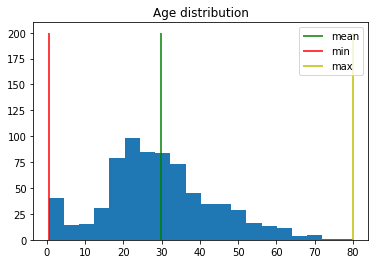

In [37]:
#Выводы: максимальный возраст около 80, а минимальный около 0 (как видно из графика).
#Средний возраст около 30, но чуть меньше.
#По гистограмме можно сказать, что распределение напоимнает нормальное, но
#младенцев больше, чем маленьких детей (есть провал примерно между 3 и 11 годами на графике)
#в целом значения смещены влево 
#(то есть и пик находится не на середине отрезка всех возрастов, и столбцы выше для левой части гистограммы)
#Наиболее непопулярный возраст - примерно от 72 до 80

plt.hist(dataset['Age'], 20)
plt.title('Age distribution')

plt.subplot()
plt.vlines(dataset['Age'].mean(), 0, 200, color = 'g', label = 'mean')

plt.subplot()
plt.vlines(dataset['Age'].min(), 0, 200, color = 'r', label = 'min')


plt.subplot()
plt.vlines(dataset['Age'].max(), 0, 200, color = 'y', label = 'max')

plt.legend()
plt.show()


---
**Task 4** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Make conclusions about what you see on the plot

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


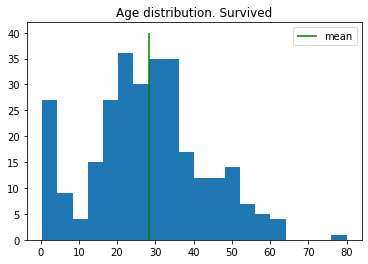

In [38]:
plt.hist(dataset[dataset['Survived'] == True]['Age'], 20)
plt.title('Age distribution. Survived')
plt.subplot()
plt.vlines(dataset[dataset['Survived'] == True]['Age'].mean(), 0, 40, color = 'g', label = 'mean')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


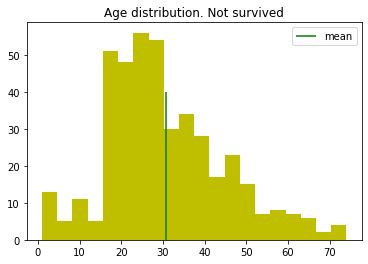

In [39]:
plt.hist(dataset[dataset['Survived'] == False]['Age'], 20, color = 'y')
plt.title('Age distribution. Not survived')
plt.subplot()
plt.vlines(dataset[dataset['Survived'] == False]['Age'].mean(), 0, 40, color = 'g', label = 'mean')
plt.legend()
plt.show()

In [40]:
#И из цифр, и на графике видно, что средний возраст выживших меньше, чем средний возраст погибших.
#Из гистограм видно, что выжили молодые люди (чуть более 20 лет), то есть это самый высокий столбец
#Так же локальный пик наблюдается у маленьких детей 0 - 5 лет приблизительно

#Если говорить о второй гистограме, то наиболее частый возраст у не выживших 15 - 30 лет
#также есть резкий скачок в значении приблизительно 15 лет
print(dataset[dataset['Survived'] == True]['Age'].mean())
print(dataset[dataset['Survived'] == False]['Age'].mean())

28.343689655172415
30.62617924528302


---
**Task 5** (0.5 points) <br/>
Is there correlation between the port of embarkation and the ticket price? Calculate mean price for each port and visualize price distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). The main point here is to **choose** plots wisely and **make meaningful conclusions**



In [41]:
dataset['Fare'].groupby(dataset['Embarked']).mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


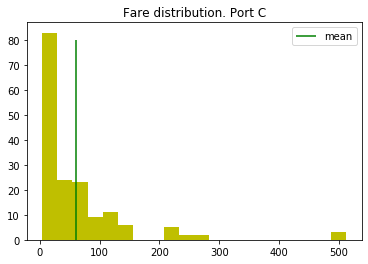

In [42]:
plt.hist(dataset[dataset['Embarked'] == 'C']['Fare'], 20, color = 'y')
plt.title('Fare distribution. Port C')
plt.subplot()
plt.vlines(dataset[dataset['Embarked'] == 'C']['Fare'].mean(), 0, 80, color = 'g', label = 'mean')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


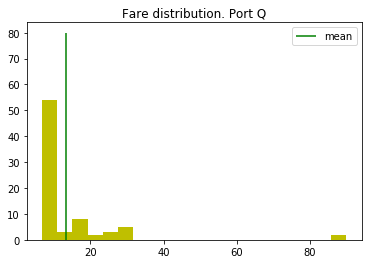

In [43]:
plt.hist(dataset[dataset['Embarked'] == 'Q']['Fare'], 20, color = 'y')
plt.title('Fare distribution. Port Q')
plt.subplot()
plt.vlines(dataset[dataset['Embarked'] == 'Q']['Fare'].mean(), 0, 80, color = 'g', label = 'mean')
plt.legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


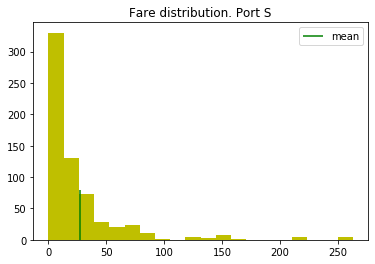

In [44]:
plt.hist(dataset[dataset['Embarked'] == 'S']['Fare'], 20, color = 'y')
plt.title('Fare distribution. Port S')
plt.subplot()
plt.vlines(dataset[dataset['Embarked'] == 'S']['Fare'].mean(), 0, 80, color = 'g', label = 'mean')
plt.legend()
plt.show()

In [45]:
#Построим дополнительные графики

In [46]:
sns.set_style('white')

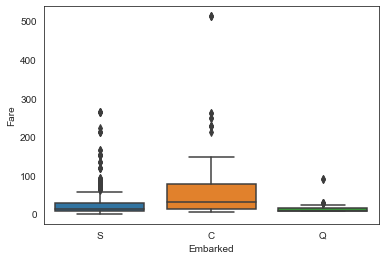

In [47]:
sns.boxplot(x='Embarked', y='Fare', data=dataset)

In [48]:
#на графике boxplot наблюдается очень много выбросов (все, что за усами)
#постараемся убрать их с помощью расчета квантилей по столбцу Fare и выброса некоторых значений

In [49]:
dfS = dataset[dataset['Embarked'] == 'S']
dfC = dataset[dataset['Embarked'] == 'C']
dfQ = dataset[dataset['Embarked'] == 'Q']

In [50]:
Q1 =  dfS['Fare'].quantile(0.25)
Q3 = dfS['Fare'].quantile(0.75)
IQR = Q3 - Q1
dfS2 = dfS[(dfS['Fare'] > Q1-1.5*IQR ) & (dfS['Fare'] < Q1+1.5*IQR)]

In [51]:
Q1 =  dfC['Fare'].quantile(0.25)
Q3 = dfC['Fare'].quantile(0.75)
IQR = Q3 - Q1
dfC2 = dfC[(dfC['Fare'] > Q1-1.5*IQR ) & (dfC['Fare'] < Q1+1.5*IQR)]

In [52]:
Q1 =  dfQ['Fare'].quantile(0.25)
Q3 = dfQ['Fare'].quantile(0.75)
IQR = Q3 - Q1
dfQ2 = dfQ[(dfQ['Fare'] > Q1-1.5*IQR ) & (dfQ['Fare'] < Q1+1.5*IQR)]

In [53]:
print(dfS2.shape[0] / dfS.shape[0])
print(dfC2.shape[0] / dfC.shape[0])
print(dfQ2.shape[0] / dfQ.shape[0])
#Видно, что осталось приблизительно 80 - 90% данных после удаления выбросов -> можно строить график, данных достаточно

0.8198757763975155
0.875
0.8441558441558441


In [54]:
df2 = pd.concat([dfS2, dfC2, dfQ2])

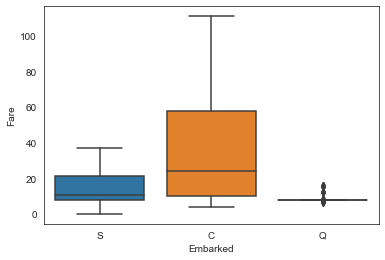

In [55]:
sns.boxplot(x='Embarked', y='Fare', data=df2)

In [56]:
#Вывод: ясно видно, что цена билета в порту C явно больше остальных (что говорят и прямые расчеты среднего через mean)
#Для порта Q цена билета ниже остальных, а для S - средняя

#Выбросы были видны и на гистограммах (отдельные столбики стоящие после больших "провалов" справа на прямой)
#И даже до удаления выбросов закономерность порт-цена была явно видна. 

---
**Task 6** (0.5 points) <br/>
The same question as in task 5 about correlation between *pclass* and *ticket priсe*.

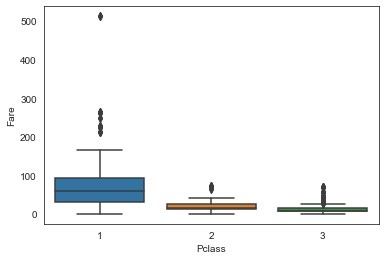

In [57]:
#Построим сразу boxplot
sns.boxplot(x='Pclass', y='Fare', data=dataset)
#Явно видна зависимость стоимости от класса, но снова много выбросов. 


In [58]:
#Уберем выбросы аналогично
df1 = dataset[dataset['Pclass'] == 1]
df2 = dataset[dataset['Pclass'] == 2]
df3 = dataset[dataset['Pclass'] == 3]

Q1 =  df1['Fare'].quantile(0.25)
Q3 = df1['Fare'].quantile(0.75)
IQR = Q3 - Q1
df12 = df1[(df1['Fare'] > Q1-1.5*IQR ) & (df1['Fare'] < Q1+1.5*IQR)]

Q1 =  df2['Fare'].quantile(0.25)
Q3 = df2['Fare'].quantile(0.75)
IQR = Q3 - Q1
df22 = df2[(df2['Fare'] > Q1-1.5*IQR ) & (df2['Fare'] < Q1+1.5*IQR)]

Q1 =  df3['Fare'].quantile(0.25)
Q3 = df3['Fare'].quantile(0.75)
IQR = Q3 - Q1
df32 = df3[(df3['Fare'] > Q1-1.5*IQR ) & (df3['Fare'] < Q1+1.5*IQR)]

print(df12.shape[0] / df1.shape[0])
print(df22.shape[0] / df2.shape[0])
print(df32.shape[0] / df3.shape[0])
#Видно, что осталось приблизительно 80 - 90% данных после удаления выбросов -> можно строить график, данных достаточно

df2 = pd.concat([df12, df22, df32])

0.8240740740740741
0.8804347826086957
0.8207739307535642


In [59]:
#Получаем, что снова после удаления выбросов осталось приблизительно 80- 90% данных
#Построим снова boxplot

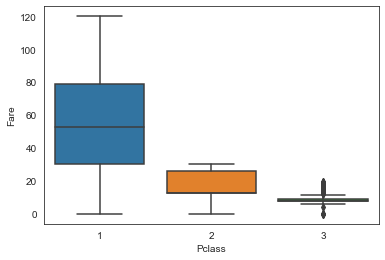

In [60]:
sns.boxplot(x='Pclass', y='Fare', data=df2)

In [61]:
#Вывод: явно прослеживается корреляция между классом и ценой билета
#Билеты в первый класс дороже всего, во второй класс - дешевле всего, а в третий - самые дешевые

In [62]:
df1 = dataset[dataset['Pclass'] == 1]
df2 = dataset[dataset['Pclass'] == 2]
df3 = dataset[dataset['Pclass'] == 3]

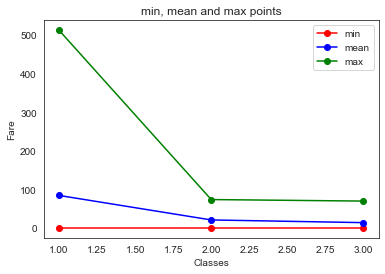

In [63]:
#Построим 3 точечных графика
#1 - соединяет 3 точки минимумов для цены по каждому классу
# 2, 3 - точки mean и max соответственно


plt.plot([1,2,3], [df1['Fare'].min(), df2['Fare'].min(), df3['Fare'].min()], 'ro-', label='min')
plt.plot([1,2,3], [df1['Fare'].mean(), df2['Fare'].mean(), df3['Fare'].mean()],'bo-', label='mean')
plt.plot([1,2,3], [df1['Fare'].max(), df2['Fare'].max(), df3['Fare'].max()],'go-', label='max')
plt.title('min, mean and max points')
plt.xlabel('Classes')
plt.ylabel('Fare')
plt.legend()
plt.show()

In [65]:
# Выводы: явно видна зависимость между ценой билета и классом (особенно на максимальных значениях)